In [1]:
import numpy as np

In [2]:
def ssa(s, k, x_0, tFinal):
    # initialize lists
    times = []
    states = []
    t = 0.0
    x = x_0
    times.append(t)
    states.append(x[1])

    while t <= tFinal:
        # When?  
        R = ReactionRates(k,x)
        lambdaVar = np.sum(R)

        # make sure we don't divide by zero
        u1 = np.random.random()
        while u1 == 0:
            u1 = np.random.random()
        tau = (1/lambdaVar) * np.log(1/u1)      

        # End time reached
        if t + tau > tFinal:
            t = tFinal
            break
        
        # Update time
        t += tau

        # What reaction happens
        goal = lambdaVar * np.random.random()
        currentSum = 0
        j = 0
        for i, rate in enumerate(R):
            currentSum+= rate
            if(currentSum > goal):
                j = i
                break
            j = i

        # Update states
        x += s[:,j]
        times.append(t)
        states.append(x[1])

    return times, states

In [3]:
def ReactionRates(k,X):
        R = np.zeros((6,1))
        R[0] = k[0]
        R[1] = k[1]*X[0]
        R[2] = k[2]*X[0]*X[1]
        R[3] = k[1]*X[1]*(3*10**7)
        R[4] = k[3]*X[1]
        R[5] = k[1]*X[2]
        return R

In [4]:
inputFile = np.loadtxt('Input.txt')
np.random.seed(seed=int(inputFile[0]))
nrSimulations = int(inputFile[1])

In [5]:
# Stoichiometric matrix
s = np.array([[1,-1,-1,0,0,0],[0,0,1,-1,-1,0],[0,0,0,0,1,-1],[0,0,0,1,0,0]])

# Reaction parameters
lamda = 1*10**(-4)
delta = 1*10**(-8)
beta = 5*10**(-5)
kr = 0.3

k = [lamda, delta, beta, kr]

In [6]:
# Initial state
x_0 =[lamda/delta, 20, 0, 0]
tFinal = 10

In [7]:
for i in range(nrSimulations):
    states, times = ssa(s, k, x_0, tFinal)
    output = np.concatenate((np.array(states,ndmin=2),np.array(times,ndmin=2)), axis=0)
    
    np.savetxt('Task1Traj'+str(i+1)+'.txt',output,delimiter = ',',fmt='%1.3f')

# in class

# X2

In [8]:
# Initial state
x_0 =[lamda/delta, 2, 0, 0]
tFinal = 10

In [9]:
nrSimulations=1000
X2=[]
for i in range(nrSimulations):
    states, times = ssa(s, k, x_0, tFinal)
    output = np.concatenate((np.array(states,ndmin=2),np.array(times,ndmin=2)), axis=0)
    X2.append(output[-1][-1])
    

(array([905.,  51.,  22.,   9.,   7.,   3.,   1.,   0.,   0.,   2.]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

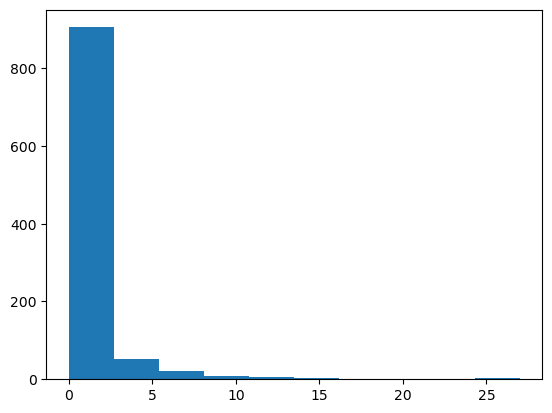

In [10]:
import matplotlib.pyplot as plt

plt.hist(X2)

In [13]:
count=0
for i in range(len(X2)):
    if X2[i]<=20:
        count+=1
probability_20 = count/len(X2)*100
print("Probability  that 0,. . . , 20 individuals are infected by T = 10 is "+ str(probability_20))


Probability  that 0,. . . , 20 individuals are infected by T = 10 is 99.8


In [16]:
count=0
for i in range(len(X2)):
    if X2[i]==0:
        count+=1
probability_0 = count/len(X2)*100
print("Probability  that the infection is still ongoing at T = 10 is "+ str(100-probability_0))

Probability  that the infection is still ongoing at T = 10 is 15.299999999999997


# X4

In [17]:
def ssa_X4(s, k, x_0, tFinal):
    # initialize lists
    times = []
    states = []
    t = 0.0
    x = x_0
    times.append(t)
    states.append(x[3])

    while t <= tFinal:
        # When?  
        R = ReactionRates(k,x)
        lambdaVar = np.sum(R)

        # make sure we don't divide by zero
        u1 = np.random.random()
        while u1 == 0:
            u1 = np.random.random()
        tau = (1/lambdaVar) * np.log(1/u1)      

        # End time reached
        if t + tau > tFinal:
            t = tFinal
            break
        
        # Update time
        t += tau

        # What reaction happens
        goal = lambdaVar * np.random.random()
        currentSum = 0
        j = 0
        for i, rate in enumerate(R):
            currentSum+= rate
            if(currentSum > goal):
                j = i
                break
            j = i

        # Update states
        x += s[:,j]
        times.append(t)
        states.append(x[3])

    return times, states

In [18]:
nrSimulations=1000
X4=[]
for i in range(nrSimulations):
    states, times = ssa_X4(s, k, x_0, tFinal)
    output = np.concatenate((np.array(states,ndmin=2),np.array(times,ndmin=2)), axis=0)
    X4.append(output[-1][-1])

(array([735., 134.,  78.,  26.,  15.,   7.,   0.,   4.,   0.,   1.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <BarContainer object of 10 artists>)

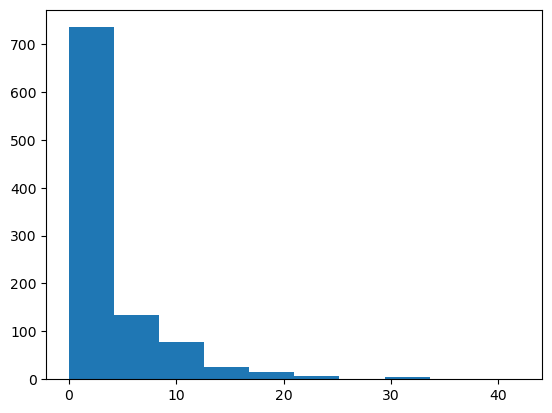

In [19]:
plt.hist(X4)

In [20]:
count=0
for i in range(len(X2)):
    if X4[i]<=35:
        count+=1
probability_35 = count/len(X4)*100
print("Probability  that 0,. . . , 35 individuals died  by T = 10 is "+ str(probability_35))


Probability  that 0,. . . , 35 individuals died  by T = 10 is 99.9


In [22]:
print(str(sum(X4)/len(X4))+ " y individuals died on average")

3.848 y individuals died on average


In [23]:
#standard deviation ???
np.std(X4)

4.616589217160219